* [Scotland's Aquaculture Map](http://aquaculture.scotland.gov.uk/map/map.aspx)
* [Shellfish results](http://www.foodstandards.gov.scot/business-and-industry/industry-specific-advice/fish-and-shellfish/shellfish-results)
* [Safety and harvesting](http://www.foodstandards.gov.scot/business-and-industry/industry-specific-advice/fish-and-shellfish)

https://twitter.com/FSScotBiotoxins

http://www.foodstandards.gov.scot/business-and-industry/industry-specific-advice/fish-and-shellfish

http://aquaculture.scotland.gov.uk/data/site_details.aspx

http://aquaculture.scotland.gov.uk/data/shellfish_species_area_classification.aspx

http://aquaculture.scotland.gov.uk/data/phytoplankton_monitoring_samples.aspx

In [47]:
%matplotlib inline


import os
import requests
import pandas as pd
import dask.dataframe as dd

data_dir_path = os.path.join(os.path.expanduser('~'), 'Downloads')

# Download files

http://www.foodstandards.gov.scot/publications-and-research/publications/shellfish-results-week-ending-03-august-2018

http://docs.python-requests.org/en/master/

In [37]:

# url = 'http://www.foodstandards.gov.scot/publications-and-research/publications/shellfish-results-week-ending-03-august-2018'


urls = 'http://www.foodstandards.gov.scot/downloads/Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_August_03.xls'
# 'http://www.foodstandards.gov.scot/downloads/Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_August_03.xlsx'
# 'http://www.foodstandards.gov.scot/downloads/Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_August_03_.xls'


#filename = 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_August_03.xls'

r = requests.get(url, stream=True)

if r.status_code == 200:
    with open(filename, 'wb') as f:
        f.write(r.content)

NameError: name 'url' is not defined

# Local filenames

In [22]:
filesnames_all = os.listdir('/home/doudlas/Downloads/')

In [23]:
filesnames_shellfish = [f for f in filesnames_all if f.startswith('Shellfish')]

In [24]:
filesnames_shellfish

['Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_July_20.xlsx',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_August_03_.xls',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_August_03.xlsx',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_July_20.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_July_20_.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_August_03.xls']

In [28]:
filenames_shellfish_phytoplankton = [f for f in filesnames_shellfish if f.startswith('Shellfish_-_Phytoplankton_')]

In [29]:
filenames_shellfish_phytoplankton

['Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_July_20.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_August_03.xlsx']

In [30]:
filenames_shellfish_e_coli = [f for f in filesnames_shellfish if f.startswith('Shellfish_-_E._coli_')]

In [31]:
filenames_shellfish_e_coli

['Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_August_03_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_July_20_.xls']

In [33]:
filenames_shellfish_biotoxin = [f for f in filesnames_shellfish if f.startswith('Shellfish_-_Biotoxin_')]

In [34]:
filenames_shellfish_biotoxin

['Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_July_20.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_August_03.xls']

# ~~`Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_July_20.xlsx`~~

## Campbeltown Loch  ~~`Shellfish Phytoplankton 2018_-_July_20`~~

# `Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_August_03.xlsx`

In [39]:
filenames_shellfish_phytoplankton

['Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_July_20.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_August_03.xlsx']

In [99]:
pyhtoplankton_ct_list = []
for f in filenames_shellfish_phytoplankton:
    pyhtoplankton_ct_list.append(pd.read_excel(os.path.join(data_dir_path, f)))
pyhtoplankton_all = pd.concat(pyhtoplankton_ct_list)

/home/doudlas/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [130]:
f = 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_August_03.xlsx'
header = ['Region', 'Area', 'Site', 'Origin of Sample', 'NGR', 'SIN', 'Sample', 'Collected', 'Received', 'Analyzed', 'Pseudo-nitzschia', 'Alexandrium', 'Dinophysis', 'Prorocentrum', 'Prorocentrum', 'Lingulodinium', 'Protoceratium']
phytoplankton_august = pd.read_excel(os.path.join(data_dir_path, f), header=None, skiprows=[0, 1, 2, 3])
phytoplankton_august.columns = header
phytoplankton_august.Region.fillna(method='ffill', inplace=True)

Text(0.5,1,'Phytoplankton')

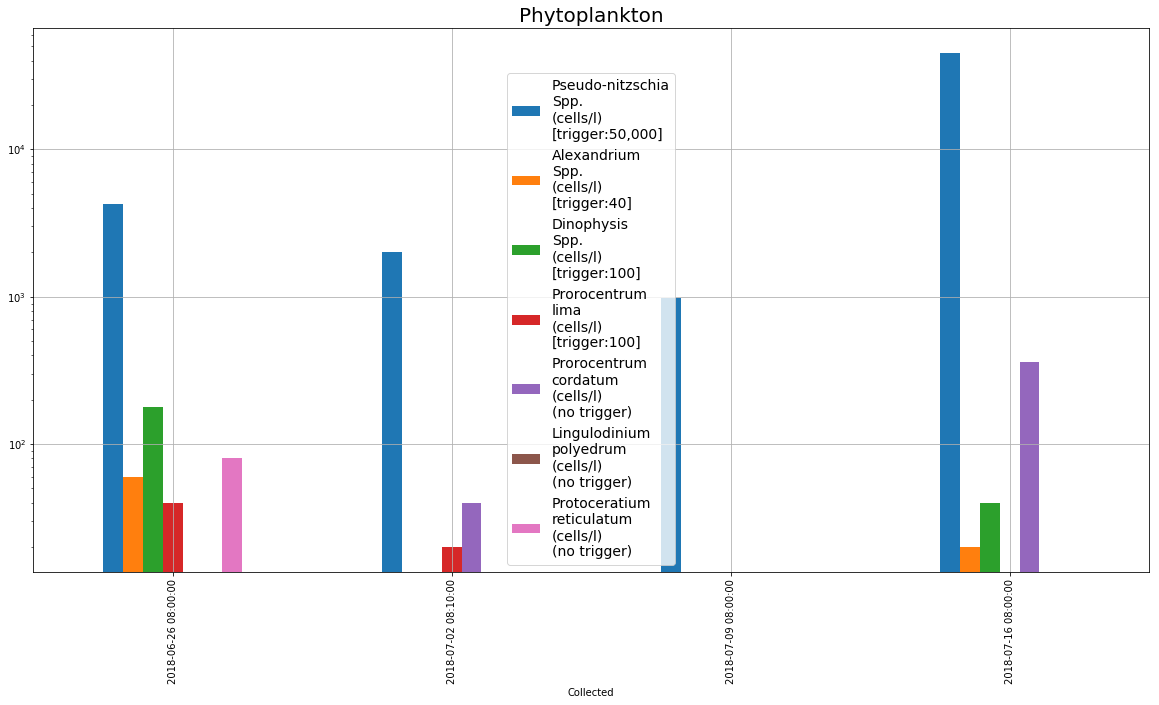

In [42]:
ax = pyhtoplankton_ct.plot.bar(figsize=(20, 10), grid=True, logy=True, label=True)
ax.legend(loc=0, fontsize=14)
ax.set_title(label="Phytoplankton", fontsize=20)

In [ ]:
# Phytoplankton
pyhtoplankton_ct_trig = pyhtoplankton_ct.iloc[:, 0:4]

Text(0.5,1,'Phytoplankton\nno trigger')

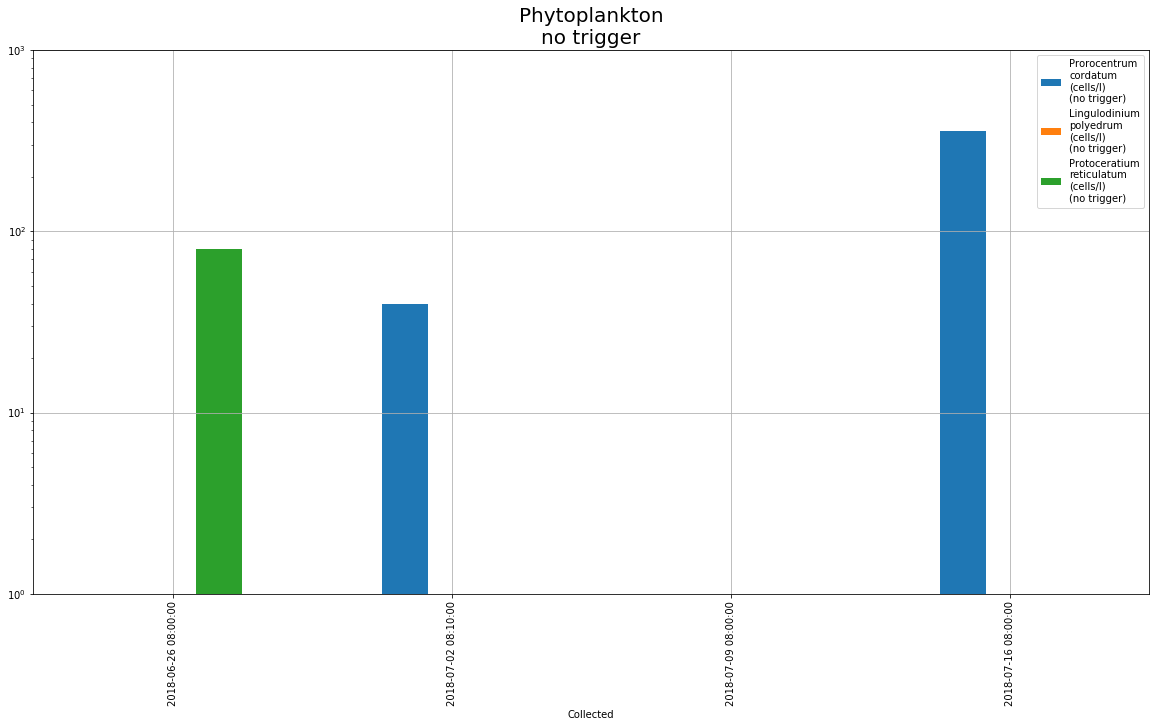

In [90]:
ax = pyhtoplankton_ct_no_trig.plot.bar(figsize=(20, 10), grid=True, logy=True, ylim=(1, 1000))
ax.set_title(label="Phytoplankton\nno trigger", fontsize=20)

In [32]:
pyhtoplankton_ct_no_trig = pyhtoplankton_ct.iloc[:, 4:]
pyhtoplankton_ct_trig_norm = pyhtoplankton_ct_trig / triggers

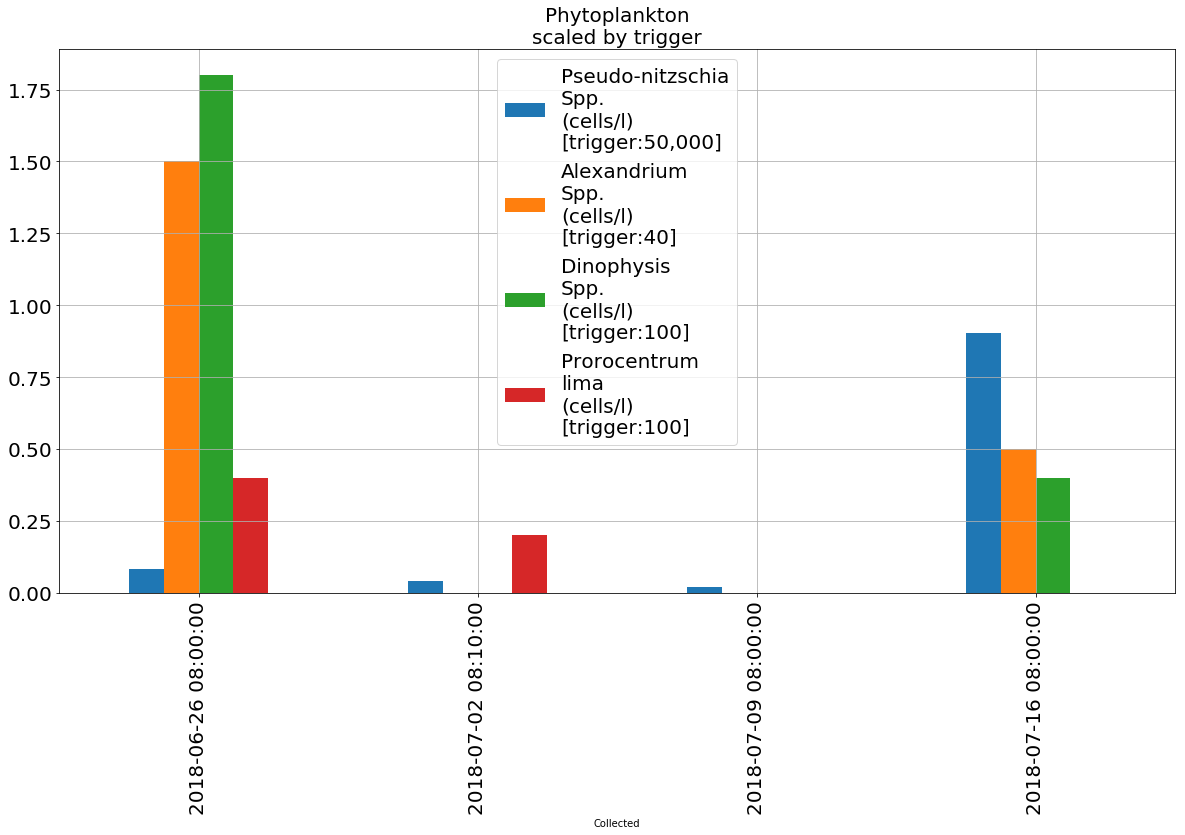

In [87]:
ax  = pyhtoplankton_ct_trig_norm.plot.bar(figsize=(20, 10)
                                      , grid=True
                                      , fontsize=20)

ax.set_title(label="Phytoplankton\nscaled by trigger", fontsize=20)
ax.legend(fontsize=20, loc=0)

# E. Coli
# ~~`'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_July_20_.xls'`~~

In [62]:
e_coli_list = []
for f in filenames_shellfish_e_coli:
    e_coli_list.append(
        pd.read_excel(os.path.join(data_dir_path
    , f))
    )

e_coli_data = pd.concat(e_coli_list)

In [63]:
#e_coli_data = pd.read_excel(os.path.join(data_dir_path
#    , 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_July_20_.xls'))

#e_coli_data = pd.read_excel(os.path.join(data_dir_path
#    , filenames_shellfish_e_coli[1]))

In [64]:
e_coli_data.columns

Index(['Sample number', 'Site SIN Number', 'Local Authority',
       'Production Area', 'Site Name', 'SIN', 'Sample For Fast Track',
       'Sample Species', 'OS Grid Reference', 'Collection Date', 'Water Temp',
       'Sample Source', 'Lab Received Date', 'Arrival Temp', 'Test Date',
       'Ecoli/100g', 'Result Classification', 'Current Area Classification',
       'UKAS No', 'Investigative/Resample', 'Date reported to FSA',
       'Sample Rejected', 'Sample rejected reason', 'Improbable combination',
       'Improbable combination value', 'Harvester's Own Results'],
      dtype='object')

In [67]:
e_coli_data['Production Area'] 

0                 Kerrera West
1                        Islay
2         North Connel Cockles
3     Lynn of Lorn Sgeir Liath
4     Loch Roag - Gob Sgrithir
5                    Seilebost
6            Luce Bay Drummore
7              Luce Bay Razors
8              Prestwick Shore
9            Troon South Beach
10                     Ayr Bay
0                     Colonsay
1               Sound of Gigha
2             West Jura Razors
3                Loch na Cille
4       Loch Craignish Cockles
5                 Kerrera West
6               Oitir Mhor Bay
7                 Kerrera East
8       Loch Fyne: Otter Ferry
9         Dunstaffnage Cockles
10             Ganavan Cockles
11               Loch Seaforth
12     Loch Leurbost: Crosbost
13                    Loch Eil
14          Loch Eil: Fassfern
15                     Arisaig
16           Little Loch Broom
17           Little Loch Broom
18                Loch Kanaird
19                Loch Eishort
20                Loch Laxford
21      

In [66]:
# There is only one row
e_coli_data[e_coli_data['Production Area'] == 'Loch na Cille']

,Sample number,Site SIN Number,Local Authority,Production Area,Site Name,SIN,Sample For Fast Track,Sample Species,OS Grid Reference,Collection Date,...,Result Classification,Current Area Classification,UKAS No,Investigative/Resample,Date reported to FSA,Sample Rejected,Sample rejected reason,Improbable combination,Improbable combination value,Harvester's Own Results
3,18/1021,AB 617 1204 04,Argyll and Bute Council,Loch na Cille,Loch na Cille Cockles,AB 617 1204 04,False,Common cockles,NM84146 12537,2018-07-17,...,C,C,2293,False,2018-07-23,False,NaN,False,NaN,False


# 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_July_20.xls'

[Biotoxins are substances which are both toxic and have a biological origin. ](http://www.biosciences-labs.bham.ac.uk/exhibit/whatare.html)

In [128]:
biotoxin = pd.read_excel(os.path.join(data_dir_path
    , 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_July_20.xls'))

In [70]:
biotoxin_list = []
for f in filenames_shellfish_biotoxin:
    biotoxin_list.append(pd.read_excel(os.path.join(data_dir_path, f)))
biotoxin = pd.concat(biotoxin_list)

In [71]:
biotoxin.columns

Index(['Source of Sample', 'Local Authority', 'Production Area', 'Site Name',
       'OSGridRef', 'SIN', 'Origin of Sample', 'Date Collected',
       'Date Received', 'Species', 'PSPScreenbyHPLC_ND-DETECTED',
       'PSP_HPLC (µg STXeq/kg) Semiquant result_<400-≥400',
       'Date PSP HPLC Screen/semi quant result reported',
       'PSP_HPLC (µg STXeq/kg) Quant_highvalue_result',
       'Date PSP HPLC Quant result reported', 'PSP_by_MBA_(µg STXeq/kg)',
       'Date PSP MBA result reported',
       'Total OA/DTXs/PTXs (µg OA eq/kg) - HIGH value result',
       'Total AZAs (µg AZA1 eq/kg) - HIGH value result',
       'Total YTXs (mg YTX eq/kg) - HIGH value result',
       'Date LC-MS result reported', 'DSP BY MBA_NG-PS',
       'Date DSP BY MBA result reported', 'ASP\n(mg /kg) ',
       'Date ASP result reported', 'CEFAS Reference BTX/2014/',
       'Temperature (Celsius) of sample on arrival'],
      dtype='object')

In [72]:
biotoxin['Date Collected'] = pd.to_datetime(biotoxin['Date Collected']) 
biotoxin = biotoxin.set_index('Date Collected')

In [73]:
biotoxin_ct = biotoxin[biotoxin['Production Area'] == 'Loch na Cille']

In [81]:
biotoxin_ct = biotoxin_ct.sort_index()

In [75]:
print(biotoxin_ct.columns)

Index(['Source of Sample', 'Local Authority', 'Production Area', 'Site Name',
       'OSGridRef', 'SIN', 'Origin of Sample', 'Date Received', 'Species',
       'PSPScreenbyHPLC_ND-DETECTED',
       'PSP_HPLC (µg STXeq/kg) Semiquant result_<400-≥400',
       'Date PSP HPLC Screen/semi quant result reported',
       'PSP_HPLC (µg STXeq/kg) Quant_highvalue_result',
       'Date PSP HPLC Quant result reported', 'PSP_by_MBA_(µg STXeq/kg)',
       'Date PSP MBA result reported',
       'Total OA/DTXs/PTXs (µg OA eq/kg) - HIGH value result',
       'Total AZAs (µg AZA1 eq/kg) - HIGH value result',
       'Total YTXs (mg YTX eq/kg) - HIGH value result',
       'Date LC-MS result reported', 'DSP BY MBA_NG-PS',
       'Date DSP BY MBA result reported', 'ASP\n(mg /kg) ',
       'Date ASP result reported', 'CEFAS Reference BTX/2014/',
       'Temperature (Celsius) of sample on arrival'],
      dtype='object')


In [82]:
biotoxin_ct['Species']

Date Collected
2018-06-27    Common mussels
2018-07-02    Common mussels
2018-07-11    Common mussels
2018-07-11    Common mussels
2018-07-17    Common mussels
2018-07-17    Common mussels
2018-07-22    Common mussels
2018-07-30    Common mussels
Name: Species, dtype: object

In [83]:
biotoxin_ct['PSP_HPLC (µg STXeq/kg) Semiquant result_<400-≥400']

Date Collected
2018-06-27    <400
2018-07-02     NaN
2018-07-11    <400
2018-07-11    <400
2018-07-17     NaN
2018-07-17     NaN
2018-07-22     NaN
2018-07-30    <400
Name: PSP_HPLC (µg STXeq/kg) Semiquant result_<400-≥400, dtype: object

In [84]:
biotoxin_ct['PSP_HPLC (µg STXeq/kg) Quant_highvalue_result']

Date Collected
2018-06-27    <RL
2018-07-02    NaN
2018-07-11    <RL
2018-07-11    <RL
2018-07-17    NaN
2018-07-17    NaN
2018-07-22    NaN
2018-07-30    <RL
Name: PSP_HPLC (µg STXeq/kg) Quant_highvalue_result, dtype: object

In [85]:
biotoxin_ct.iloc[:, 8]

Date Collected
2018-06-27    Common mussels
2018-07-02    Common mussels
2018-07-11    Common mussels
2018-07-11    Common mussels
2018-07-17    Common mussels
2018-07-17    Common mussels
2018-07-22    Common mussels
2018-07-30    Common mussels
Name: Species, dtype: object

In [86]:
biotoxin_ct.iloc[:, 9]

Date Collected
2018-06-27    Detected
2018-07-02          ND
2018-07-11    Detected
2018-07-11    Detected
2018-07-17         NaN
2018-07-17         NaN
2018-07-22         NaN
2018-07-30    Detected
Name: PSPScreenbyHPLC_ND-DETECTED, dtype: object

In [87]:
biotoxin_ct.iloc[:, 10]

Date Collected
2018-06-27    <400
2018-07-02     NaN
2018-07-11    <400
2018-07-11    <400
2018-07-17     NaN
2018-07-17     NaN
2018-07-22     NaN
2018-07-30    <400
Name: PSP_HPLC (µg STXeq/kg) Semiquant result_<400-≥400, dtype: object

In [88]:
biotoxin_ct.iloc[:, 12]

Date Collected
2018-06-27    <RL
2018-07-02    NaN
2018-07-11    <RL
2018-07-11    <RL
2018-07-17    NaN
2018-07-17    NaN
2018-07-22    NaN
2018-07-30    <RL
Name: PSP_HPLC (µg STXeq/kg) Quant_highvalue_result, dtype: object

In [89]:
biotoxin_ct.iloc[:, 14]

Date Collected
2018-06-27   NaN
2018-07-02   NaN
2018-07-11   NaN
2018-07-11   NaN
2018-07-17   NaN
2018-07-17   NaN
2018-07-22   NaN
2018-07-30   NaN
Name: PSP_by_MBA_(µg STXeq/kg), dtype: float64

In [90]:
biotoxin_ct.iloc[:, 16]

Date Collected
2018-06-27     92
2018-07-02     60
2018-07-11     64
2018-07-11     64
2018-07-17    169
2018-07-17    169
2018-07-22    122
2018-07-30    181
Name: Total OA/DTXs/PTXs (µg OA eq/kg) - HIGH value result, dtype: object

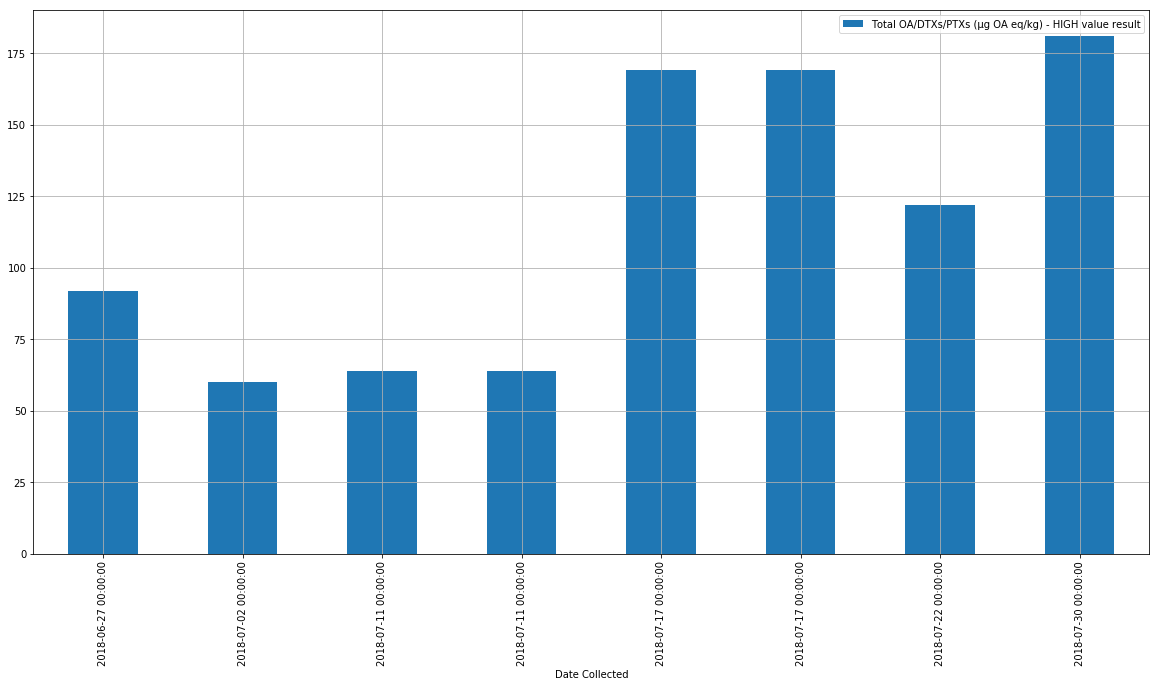

In [91]:
pd.DataFrame(biotoxin_ct.iloc[:, 16]).plot.bar(figsize=(20, 10), grid=True)

In [92]:
biotoxin_ct.iloc[:, 17]

Date Collected
2018-06-27    <RL
2018-07-02    <RL
2018-07-11    <RL
2018-07-11    <RL
2018-07-17    <RL
2018-07-17    <RL
2018-07-22    <RL
2018-07-30    <RL
Name: Total AZAs (µg AZA1 eq/kg) - HIGH value result, dtype: object

In [93]:
biotoxin_ct.iloc[:, 18]

Date Collected
2018-06-27    <RL
2018-07-02    <RL
2018-07-11    0.1
2018-07-11    0.1
2018-07-17      1
2018-07-17      1
2018-07-22    0.2
2018-07-30    0.3
Name: Total YTXs (mg YTX eq/kg) - HIGH value result, dtype: object

In [95]:
biotoxin_ct.iloc[:, 20]

Date Collected
2018-06-27   NaN
2018-07-02   NaN
2018-07-11   NaN
2018-07-11   NaN
2018-07-17   NaN
2018-07-17   NaN
2018-07-22   NaN
2018-07-30   NaN
Name: DSP BY MBA_NG-PS, dtype: float64

In [96]:
biotoxin_ct.iloc[:, 22]

Date Collected
2018-06-27     NaN
2018-07-02    <LOQ
2018-07-11     NaN
2018-07-11     NaN
2018-07-17     NaN
2018-07-17     NaN
2018-07-22     NaN
2018-07-30    <LOQ
Name: ASP\n(mg /kg) , dtype: object

# Map

http://geo.holoviews.org/Working_with_Bokeh.html

https://scipython.com/book/chapter-2-the-core-python-language-i/additional-problems/converting-between-an-os-grid-reference-and-longitudelatitude/

https://stackoverflow.com/questions/39117276/python-to-convert-map-reference-to-latitude-longitude

http://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/

In [7]:
# http://geo.holoviews.org/Working_with_Bokeh.html

import xarray as xr
import numpy as np
import pandas as pd
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf

import cartopy
from cartopy import crs as ccrs

from bokeh.tile_providers import STAMEN_TONER
from bokeh.models import WMTSTileSource

hv.notebook_extension('bokeh')

AttributeError: module 'numpy' has no attribute '__version__'